In [334]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 80)

In [335]:
dataFolder = r"C:\Users\jaker\Documents\RoboData-Experiment1"
data1 = "gMitTile_s05_t1.csv"


df = pd.read_csv(os.path.join(dataFolder, data1))

In [336]:
df = df.rename(columns={'Unnamed: 0': 'Seq'})
df = df.set_index('Seq')

In [337]:
print(df.isnull().sum().sum())
df.head(10)

195435


,Time,OdomPosX,OdomPosY,OdomPosZ,OdomOrientX,OdomOrientY,OdomOrientZ,OdomOrientW,OdomLinX,OdomLinY,OdomLinZ,OdomAngX,OdomAngY,OdomAngZ,Sensor,ImuOrientX,ImuOrientY,ImuOrientZ,ImuOrientW,ImuAngVelX,ImuAngVelY,ImuAngVelZ,ImuAccelX,ImuAccelY,ImuAccelZ
Seq,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imu,-0.000328,-0.015016,-0.838270,0.545041,0.000000,0.000000,0.006385,0.071826,0.256778,10.560225
1,0.004247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imu,0.000193,-0.014518,-0.838270,0.545054,-0.009578,0.000000,0.005321,-0.094571,0.213683,10.101137
2,0.009732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imu,0.000766,-0.014130,-0.838280,0.545049,-0.009578,-0.006385,0.000000,-0.221464,0.270545,10.559627
3,0.020411,4.514153,-1.257235,0.0,0.0,0.0,-0.141629,0.98992,0.051224,0.0,0.0,0.0,0.0,0.001223,Odom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.027292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imu,0.000794,-0.015573,-0.838264,0.545034,-0.021284,-0.014899,0.000000,0.193332,0.356736,10.025720
5,0.031982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imu,0.000779,-0.015025,-0.838279,0.545027,-0.022348,-0.020220,-0.004257,0.065841,0.161609,10.083778
6,0.036984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imu,0.000779,-0.015025,-0.838279,0.545027,-0.022348,-0.020220,-0.004257,0.065841,0.161609,10.083778
7,0.041364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imu,-0.000030,-0.014898,-0.838286,0.545020,-0.024477,-0.015963,-0.005321,0.301071,0.166397,10.798448
8,0.047823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imu,-0.000808,-0.014995,-0.838290,0.545010,-0.025541,-0.009578,-0.005321,0.353145,0.192733,10.463859


In [338]:
df = df.interpolate(method='polynomial', order=1)

In [339]:
df.head(10)

,Time,OdomPosX,OdomPosY,OdomPosZ,OdomOrientX,OdomOrientY,OdomOrientZ,OdomOrientW,OdomLinX,OdomLinY,OdomLinZ,OdomAngX,OdomAngY,OdomAngZ,Sensor,ImuOrientX,ImuOrientY,ImuOrientZ,ImuOrientW,ImuAngVelX,ImuAngVelY,ImuAngVelZ,ImuAccelX,ImuAccelY,ImuAccelZ
Seq,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imu,-0.000328,-0.015016,-0.838270,0.545041,0.000000,0.000000,0.006385,0.071826,0.256778,10.560225
1,0.004247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imu,0.000193,-0.014518,-0.838270,0.545054,-0.009578,0.000000,0.005321,-0.094571,0.213683,10.101137
2,0.009732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imu,0.000766,-0.014130,-0.838280,0.545049,-0.009578,-0.006385,0.000000,-0.221464,0.270545,10.559627
3,0.020411,4.514153,-1.257235,0.0,0.0,0.0,-0.141629,0.989920,0.051224,0.0,0.0,0.0,0.0,0.001223,Odom,0.000780,-0.014852,-0.838272,0.545041,-0.015431,-0.010642,0.000000,-0.014066,0.313640,10.292673
4,0.027292,4.514382,-1.257302,0.0,0.0,0.0,-0.141644,0.989918,0.050925,0.0,0.0,0.0,0.0,0.000202,Imu,0.000794,-0.015573,-0.838264,0.545034,-0.021284,-0.014899,0.000000,0.193332,0.356736,10.025720
5,0.031982,4.514611,-1.257369,0.0,0.0,0.0,-0.141658,0.989916,0.050626,0.0,0.0,0.0,0.0,-0.000820,Imu,0.000779,-0.015025,-0.838279,0.545027,-0.022348,-0.020220,-0.004257,0.065841,0.161609,10.083778
6,0.036984,4.514840,-1.257436,0.0,0.0,0.0,-0.141672,0.989914,0.050328,0.0,0.0,0.0,0.0,-0.001842,Imu,0.000779,-0.015025,-0.838279,0.545027,-0.022348,-0.020220,-0.004257,0.065841,0.161609,10.083778
7,0.041364,4.515069,-1.257503,0.0,0.0,0.0,-0.141687,0.989912,0.050029,0.0,0.0,0.0,0.0,-0.002864,Imu,-0.000030,-0.014898,-0.838286,0.545020,-0.024477,-0.015963,-0.005321,0.301071,0.166397,10.798448
8,0.047823,4.515298,-1.257570,0.0,0.0,0.0,-0.141701,0.989910,0.049730,0.0,0.0,0.0,0.0,-0.003885,Imu,-0.000808,-0.014995,-0.838290,0.545010,-0.025541,-0.009578,-0.005321,0.353145,0.192733,10.463859


In [340]:
print(df.isnull().sum().sum())

104


In [341]:
df = df.dropna()
print(df.isnull().sum().sum())
df = df.reset_index().drop(columns=['Seq'])
df.head()

0


,Time,OdomPosX,OdomPosY,OdomPosZ,OdomOrientX,OdomOrientY,OdomOrientZ,OdomOrientW,OdomLinX,OdomLinY,OdomLinZ,OdomAngX,OdomAngY,OdomAngZ,Sensor,ImuOrientX,ImuOrientY,ImuOrientZ,ImuOrientW,ImuAngVelX,ImuAngVelY,ImuAngVelZ,ImuAccelX,ImuAccelY,ImuAccelZ
0,0.020411,4.514153,-1.257235,0.0,0.0,0.0,-0.141629,0.989920,0.051224,0.0,0.0,0.0,0.0,0.001223,Odom,0.000780,-0.014852,-0.838272,0.545041,-0.015431,-0.010642,0.000000,-0.014066,0.313640,10.292673
1,0.027292,4.514382,-1.257302,0.0,0.0,0.0,-0.141644,0.989918,0.050925,0.0,0.0,0.0,0.0,0.000202,Imu,0.000794,-0.015573,-0.838264,0.545034,-0.021284,-0.014899,0.000000,0.193332,0.356736,10.025720
2,0.031982,4.514611,-1.257369,0.0,0.0,0.0,-0.141658,0.989916,0.050626,0.0,0.0,0.0,0.0,-0.000820,Imu,0.000779,-0.015025,-0.838279,0.545027,-0.022348,-0.020220,-0.004257,0.065841,0.161609,10.083778
3,0.036984,4.514840,-1.257436,0.0,0.0,0.0,-0.141672,0.989914,0.050328,0.0,0.0,0.0,0.0,-0.001842,Imu,0.000779,-0.015025,-0.838279,0.545027,-0.022348,-0.020220,-0.004257,0.065841,0.161609,10.083778
4,0.041364,4.515069,-1.257503,0.0,0.0,0.0,-0.141687,0.989912,0.050029,0.0,0.0,0.0,0.0,-0.002864,Imu,-0.000030,-0.014898,-0.838286,0.545020,-0.024477,-0.015963,-0.005321,0.301071,0.166397,10.798448


In [342]:
df = df.drop(columns=['OdomPosZ', 'OdomOrientX', 'OdomOrientY', 'OdomLinY', 'OdomLinZ', 'OdomAngX', 'OdomAngY'])

In [343]:
def getDeltaCol(col,delta): 
    deltaCol = pd.Series([ col.iloc[i] - col.iloc[i-delta] if i>=delta else 0 for i in range(len(col))])
    return deltaCol

In [344]:
print(getDeltaCol(df.Time, 1).head(10))
print(df.Time)


0    0.000000
1    0.006881
2    0.004690
3    0.005003
4    0.004379
5    0.006459
6    0.005495
7    0.010715
8    0.009037
9    0.006578
dtype: float64
0         0.020411
1         0.027292
2         0.031982
3         0.036984
4         0.041364
           ...    
15650    95.739641
15651    95.757324
15652    95.762442
15653    95.766934
15654    95.774400
Name: Time, Length: 15655, dtype: float64


In [345]:
dList = [2,4,8,16,32,64]
for col in df.columns.tolist():
    if col!='Sensor':
        for d in dList:
            df[col+'Delta{}'.format(d)] = getDeltaCol(df[col], d)
            print('Added ' + col +'Delta{}'.format(d))
    else:
        print('Skipped sensor')

Added TimeDelta2
Added TimeDelta4
Added TimeDelta8
Added TimeDelta16
Added TimeDelta32
Added TimeDelta64
Added OdomPosXDelta2
Added OdomPosXDelta4
Added OdomPosXDelta8
Added OdomPosXDelta16
Added OdomPosXDelta32
Added OdomPosXDelta64
Added OdomPosYDelta2
Added OdomPosYDelta4
Added OdomPosYDelta8
Added OdomPosYDelta16
Added OdomPosYDelta32
Added OdomPosYDelta64
Added OdomOrientZDelta2
Added OdomOrientZDelta4
Added OdomOrientZDelta8
Added OdomOrientZDelta16
Added OdomOrientZDelta32
Added OdomOrientZDelta64
Added OdomOrientWDelta2
Added OdomOrientWDelta4
Added OdomOrientWDelta8
Added OdomOrientWDelta16
Added OdomOrientWDelta32
Added OdomOrientWDelta64
Added OdomLinXDelta2
Added OdomLinXDelta4
Added OdomLinXDelta8
Added OdomLinXDelta16
Added OdomLinXDelta32
Added OdomLinXDelta64
Added OdomAngZDelta2
Added OdomAngZDelta4
Added OdomAngZDelta8
Added OdomAngZDelta16
Added OdomAngZDelta32
Added OdomAngZDelta64
Skipped sensor
Added ImuOrientXDelta2
Added ImuOrientXDelta4
Added ImuOrientXDelta8
A

In [346]:
df.head(33)

,Time,OdomPosX,OdomPosY,OdomOrientZ,OdomOrientW,OdomLinX,OdomAngZ,Sensor,ImuOrientX,ImuOrientY,ImuOrientZ,ImuOrientW,ImuAngVelX,ImuAngVelY,ImuAngVelZ,ImuAccelX,ImuAccelY,ImuAccelZ,TimeDelta2,TimeDelta4,TimeDelta8,TimeDelta16,TimeDelta32,TimeDelta64,OdomPosXDelta2,OdomPosXDelta4,OdomPosXDelta8,OdomPosXDelta16,OdomPosXDelta32,OdomPosXDelta64,...,ImuAngVelYDelta2,ImuAngVelYDelta4,ImuAngVelYDelta8,ImuAngVelYDelta16,ImuAngVelYDelta32,ImuAngVelYDelta64,ImuAngVelZDelta2,ImuAngVelZDelta4,ImuAngVelZDelta8,ImuAngVelZDelta16,ImuAngVelZDelta32,ImuAngVelZDelta64,ImuAccelXDelta2,ImuAccelXDelta4,ImuAccelXDelta8,ImuAccelXDelta16,ImuAccelXDelta32,ImuAccelXDelta64,ImuAccelYDelta2,ImuAccelYDelta4,ImuAccelYDelta8,ImuAccelYDelta16,ImuAccelYDelta32,ImuAccelYDelta64,ImuAccelZDelta2,ImuAccelZDelta4,ImuAccelZDelta8,ImuAccelZDelta16,ImuAccelZDelta32,ImuAccelZDelta64
0,0.020411,4.514153,-1.257235,-0.141629,0.989920,0.051224,0.001223,Odom,0.000780,-0.014852,-0.838272,0.545041,-0.015431,-0.010642,0.000000,-0.014066,0.313640,10.292673,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.027292,4.514382,-1.257302,-0.141644,0.989918,0.050925,0.000202,Imu,0.000794,-0.015573,-0.838264,0.545034,-0.021284,-0.014899,0.000000,0.193332,0.356736,10.025720,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.031982,4.514611,-1.257369,-0.141658,0.989916,0.050626,-0.000820,Imu,0.000779,-0.015025,-0.838279,0.545027,-0.022348,-0.020220,-0.004257,0.065841,0.161609,10.083778,0.011571,0.000000,0.000000,0.000000,0.000000,0.0,0.000458,0.000000,0.000000,0.000000,0.000000,0.0,...,-0.009578,0.000000,0.000000,0.000000,0.000000,0.0,-0.004257,0.000000,0.000000,0.000000,0.0,0.0,0.079906,0.000000,0.000000,0.000000,0.000000,0.0,-0.152032,0.000000,0.000000,0.000000,0.000000,0.0,-0.208895,0.000000,0.000000,0.000000,0.000000,0.0
3,0.036984,4.514840,-1.257436,-0.141672,0.989914,0.050328,-0.001842,Imu,0.000779,-0.015025,-0.838279,0.545027,-0.022348,-0.020220,-0.004257,0.065841,0.161609,10.083778,0.009693,0.000000,0.000000,0.000000,0.000000,0.0,0.000458,0.000000,0.000000,0.000000,0.000000,0.0,...,-0.005321,0.000000,0.000000,0.000000,0.000000,0.0,-0.004257,0.000000,0.000000,0.000000,0.0,0.0,-0.127491,0.000000,0.000000,0.000000,0.000000,0.0,-0.195127,0.000000,0.000000,0.000000,0.000000,0.0,0.058059,0.000000,0.000000,0.000000,0.000000,0.0
4,0.041364,4.515069,-1.257503,-0.141687,0.989912,0.050029,-0.002864,Imu,-0.000030,-0.014898,-0.838286,0.545020,-0.024477,-0.015963,-0.005321,0.301071,0.166397,10.798448,0.009382,0.020953,0.000000,0.000000,0.000000,0.0,0.000458,0.000916,0.000000,0.000000,0.000000,0.0,...,0.004257,-0.005321,0.000000,0.000000,0.000000,0.0,-0.001064,-0.005321,0.000000,0.000000,0.0,0.0,0.235230,0.315137,0.000000,0.000000,0.000000,0.0,0.004788,-0.147243,0.000000,0.000000,0.000000,0.0,0.714669,0.505774,0.000000,0.000000,0.000000,0.0
5,0.047823,4.515298,-1.257570,-0.141701,0.989910,0.049730,-0.003885,Imu,-0.000808,-0.014995,-0.838290,0.545010,-0.025541,-0.009578,-0.005321,0.353145,0.192733,10.463859,0.010839,0.020532,0.000000,0.000000,0.000000,0.0,0.000458,0.000916,0.000000,0.000000,0.000000,0.0,...,0.010642,0.005321,0.000000,0.000000,0.000000,0.0,-0.001064,-0.005321,0.000000,0.000000,0.0,0.0,0.287304,0.159813,0.000000,0.000000,0.000000,0.0,0.031125,-0.164003,0.000000,0.000000,0.000000,0.0,0.380080,0.438139,0.000000,0.000000,0.000000,0.0
6,0.053318,4.515528,-1.257637,-0.141715,0.989908,0.049431,-0.004907,Imu,

In [347]:
df = df.iloc[64:].reset_index().drop(columns=['index'])

In [348]:
df = df.drop(columns=['Sensor', 'Time'])


### Kmeans
#### Now that we have processed the data, we can apply Kmeans to cluster it.

In [349]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df))

In [350]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [351]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

In [352]:
df['Cluster'] = labels

In [353]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,Cluster
0,-1.737293,1.793938,-1.792837,-1.847422,0.282303,-0.889110,-2.066886,-0.290851,-1.777101,-1.797142,0.599799,-0.534673,-0.081823,1.080351,-0.361570,-1.295312,-0.315462,0.091575,-0.163135,0.210988,0.252457,0.413359,-0.083053,-0.178747,-0.396260,0.146246,0.143602,0.532687,-0.050831,0.013299,...,-0.286810,0.105434,0.240898,-1.589180,0.099888,0.000125,0.933375,0.000117,1.777165,-0.002205,-0.001713,1.379830,0.060951,0.031511,0.553213,-0.124132,1.571411,-0.158978,-0.397663,-0.066809,0.843163,-0.648566,-0.643164,-1.238190,-0.689776,-0.770305,-1.510033,-0.982303,-0.679962,0
1,-1.737083,1.793707,-1.793112,-1.847718,0.468610,-0.686291,-2.374552,-0.279277,-1.774610,-1.795832,0.726424,-0.460125,-0.081823,0.903580,-0.798575,-0.146443,-0.403599,-0.246578,-0.211938,0.130150,0.027121,0.292147,-0.083053,-0.106715,-0.346498,0.187549,0.180821,0.571026,-0.050831,-0.065019,...,0.107415,0.158248,0.385644,-1.589180,0.347721,0.000125,0.466685,0.000117,1.888271,0.695838,-0.001713,-0.142138,0.491124,-0.091118,0.755936,-0.053511,0.584357,-0.344424,-0.546785,-0.386998,0.012793,-1.023572,-1.180811,0.793811,-0.166962,0.034952,0.467994,-0.094746,0.769476,0
2,-1.736874,1.793477,-1.793386,-1.848015,0.654917,-0.483472,-2.069981,-0.393693,-1.776297,-1.797369,0.536486,0.061715,-0.081823,0.165303,0.195492,-0.574767,-0.330631,-0.472925,-0.245961,0.171903,0.016843,0.307869,-0.083053,-0.106715,-0.296736,0.228853,0.218039,0.609364,-0.050831,-0.065019,...,0.931704,0.580756,0.868133,-1.153159,0.942520,0.000125,-0.000004,0.000117,1.554954,0.637668,0.421406,-0.735873,0.541525,-0.819682,-0.182594,-0.046205,0.584357,0.438990,0.229892,0.281528,1.017804,0.084553,0.577262,0.497794,-0.753107,-0.182496,-0.687403,-0.333541,0.327541,0
3,-1.736665,1.793246,-1.793660,-1.848312,0.841224,-0.280653,-1.801485,-0.314610,-1.778509,-1.797910,0.694768,0.322635,-0.081823,-0.514052,0.161876,-0.912023,0.240971,-0.119067,-0.026903,0.069691,0.092418,0.478085,-0.083053,-0.106715,-0.246975,0.270156,-0.035512,0.647703,-0.050831,-0.065019,...,0.824188,0.395909,0.988756,-0.896676,1.116003,0.000125,-0.000004,0.553736,0.777215,0.579498,0.421406,-1.140058,-1.078362,-1.740607,-0.812035,0.002499,0.097658,0.756898,0.338627,-0.401072,0.528479,0.469694,0.554173,-0.529273,0.269303,-1.131549,-0.860212,-0.508235,0.088099,0
4,-1.736458,1.793019,-1.793446,-1.848081,0.748070,-0.237382,-1.532989,-0.235526,-1.780722,-1.798452,0.853049,0.583555,-0.081823,-1.193406,0.128260,-1.249278,0.687561,0.261209,0.267610,0.190710,0.332500,0.679745,-0.092753,-0.112946,-0.201517,0.010968,-0.292849,0.682949,-0.040219,-0.058229,...,1.075058,0.580756,1.109378,-0.768435,1.091219,0.000125,-0.000004,0.775184,-0.000524,0.463157,0.527185,-1.092671,-1.537838,-1.514583,-1.441475,-0.662312,-1.364920,-0.053009,0.316880,-0.091439,0.039154,0.706184,0.504696,-0.466334,0.032171,-0.655269,-1.033021,-0.934404,-1.848038,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15586,1.728707,-1.674380,1.808072,1.741798,-0.596000,-0.155069,-1.061641,-0.785014,1.824271,1.797372,-0.793079,0.061715,-0.896182,-1.761845,-1.389252,-1.989837,-0.334615,-0.777783,-0.171547,-0.317647,-0.439508,-0.305804,-0.292648,-0.460537,-0.811537,-1.151754,0.427339,-0.749993,0.401658,0.589229,...,-0.000101,0.422315,0.192649,-0.563249,0.645120,0.195165,-0.133344,-0.996397,-0.556052,0.230476,-1.376850,-1.783968,-1.671462,-2.654317,-1.626679,-0.258068,-1.796989,-1.089992,-1.354530,-2.572021,-0.072880,-0.803974,-0.633269,-1.467809,-1.394839,-1.048077,-0.507452,-0.835786,-2.227450,2
15587,1.728883,-1.674539,1.805969,1.739912,-0.516154,-0.475320,-1.269802,-1.169156,1.827767,1.796341,-2.059331,-0.

In [354]:
pca_1d = PCA(n_components=1)
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

In [355]:
pc1Df = pd.DataFrame(pca_1d.fit_transform(df.drop(columns=['Cluster'])))
pc2Df = pd.DataFrame(pca_2d.fit_transform(df.drop(columns=['Cluster'])))
pc3Df = pd.DataFrame(pca_3d.fit_transform(df.drop(columns=['Cluster'])))

In [356]:
pc1Df.columns = ["PC1_1d"]
pc2Df.columns = ["PC1_2d", "PC2_2d"]
pc3Df.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [357]:
pc3Df

,PC1_3d,PC2_3d,PC3_3d
0,-1.838103,4.273055,3.291510
1,-0.867924,4.725396,3.384396
2,-0.821438,2.989075,3.423011
3,-1.079252,2.757119,3.656834
4,-1.273260,2.803325,3.728016
...,...,...,...
15586,-1.598966,-4.408330,-4.770495
15587,-2.038734,-5.692187,-4.869533
15588,-2.158812,-5.397130,-4.936370
15589,-3.111289,-5.544737,-5.217691


In [358]:
df = pd.concat([df, pc1Df, pc2Df, pc3Df], axis=1, join='inner')
df['Zeros']=0

In [359]:
c0 = df[df['Cluster']==0]
c1 = df[df['Cluster']==1]
c2 = df[df['Cluster']==2]

<IPython.core.display.Javascript object>


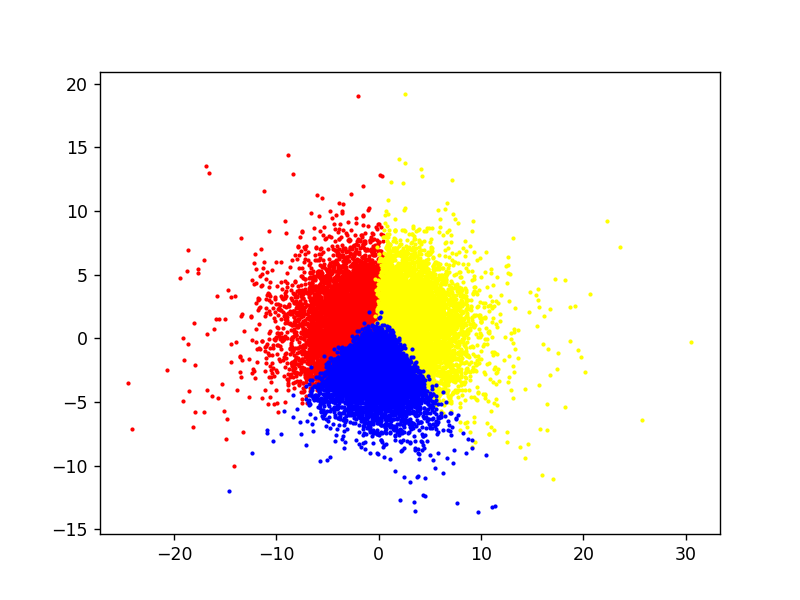

In [361]:
plt.figure()
plt.scatter(x=c0['PC1_2d'], y=c0['PC2_2d'], c='red', s=2)
plt.scatter(x=c1['PC1_2d'], y=c1['PC2_2d'], c='yellow', s=2)
plt.scatter(x=c2['PC1_2d'], y=c2['PC2_2d'], c='blue', s=2)